First, we need to know how far back to go. We want equal number of days before and after November 18, 2014.

In [1]:
from datetime import datetime, timedelta
pivot = datetime.strptime('11/18/2014', '%m/%d/%Y')
today = datetime.strptime('1/18/2016', '%m/%d/%Y')
print today - pivot

426 days, 0:00:00


In [2]:
period = timedelta(days=426)
print pivot - period

2013-09-18 00:00:00


This was run on 1/26/2016, 434 days after November 18, 2014. But the Data Portal only has data up to 1/18/2016, so we want to go to 426 days before the pivot, which works out to 9/18/2013.

Now let's download the crime data for processing. We've already filtered it on the Data Portal side to make sure it only contains a) the date range we want, b) the UCRs we're interested in, and c) the beats we're interested in.

In [3]:
import pandas as pd
url = 'https://data.cityofchicago.org/api/views/qa42-2iy9/rows.csv?accessType=DOWNLOAD'
frame = pd.read_csv(url, parse_dates=['Date'])
print frame.head(2)
print '%d crimes found' % len(frame)

         ID Case Number                Date                 Block  IUCR  \
0  10381833    HZ117903 2016-01-16 13:40:00      018XX S STATE ST  0486   
1  10381906    HZ116891 2016-01-15 16:15:00  024XX S MICHIGAN AVE  0486   

  Primary Type              Description Location Description Arrest Domestic  \
0      BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   True     True   
1      BATTERY  DOMESTIC BATTERY SIMPLE                OTHER  False     True   

               ...                Ward  Community Area  FBI Code  \
0              ...                   3              33       08B   
1              ...                   2              33       08B   

   X Coordinate Y Coordinate  Year              Updated On   Latitude  \
0       1176618      1891424  2016  01/23/2016 03:54:34 PM  41.857417   
1       1177594      1888281  2016  01/22/2016 04:00:44 PM  41.848771   

   Longitude                       Location  
0 -87.627187  (41.857417366, -87.627187001)  
1 -87.623700  (4

Before we do anything, we should add a column for just date so we can do statistics at the level of individual dates, which is kinda what we're after.

In [4]:
frame['Date Only'] = pd.to_datetime(frame['Date'].apply(lambda x: x.date()))
pivot = pivot.date()

Our first question: were there more crimes of all types committed before or after the pivot?

In [9]:
print '%d crimes on or after %s' % (frame[frame['Date Only'] >= pivot].Date.count(), pivot)

150 crimes on or after 2014-11-18


In [10]:
print '%d crimes before %s' % (frame[frame['Date Only'] < pivot].Date.count(), pivot)

130 crimes before 2014-11-18


Now let's graph it.

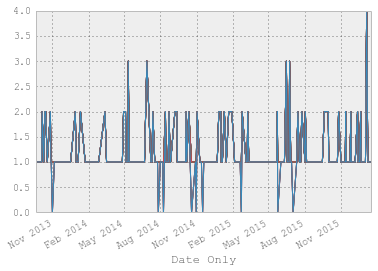

In [7]:
# Let's get nicer-looking plots. Can't use ggplot because my version of matplotlib is too old (I think).
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 10000) 
pd.set_option('display.max_columns', 60)
# We need to specifically ask matplotlib to display plots inline
%matplotlib inline
import matplotlib.pyplot as plt
frame.groupby('Date Only').count().plot(legend=None)

Last question (for now): Did any particular type of crime spike before or after the pivot?

In [8]:
for ucr in frame['IUCR'].unique():
    print ucr
    ucr_frame = frame[frame['IUCR'] == ucr]
    print '%d crimes on or after %s' % (ucr_frame[ucr_frame['Date Only'] >= pivot].Date.count(), pivot)
    print '%d crimes before %s' % (ucr_frame[ucr_frame['Date Only'] < pivot].Date.count(), pivot)
    print '---'

0486
108 crimes on or after 2014-11-18
111 crimes before 2014-11-18
---
0530
4 crimes on or after 2014-11-18
1 crimes before 2014-11-18
---
0520
7 crimes on or after 2014-11-18
5 crimes before 2014-11-18
---
0484
13 crimes on or after 2014-11-18
2 crimes before 2014-11-18
---
051A
8 crimes on or after 2014-11-18
2 crimes before 2014-11-18
---
0545
2 crimes on or after 2014-11-18
3 crimes before 2014-11-18
---
0479
1 crimes on or after 2014-11-18
2 crimes before 2014-11-18
---
0483
2 crimes on or after 2014-11-18
0 crimes before 2014-11-18
---
0554
4 crimes on or after 2014-11-18
3 crimes before 2014-11-18
---
0550
1 crimes on or after 2014-11-18
0 crimes before 2014-11-18
---
0555
0 crimes on or after 2014-11-18
1 crimes before 2014-11-18
---
